# All models are wrong

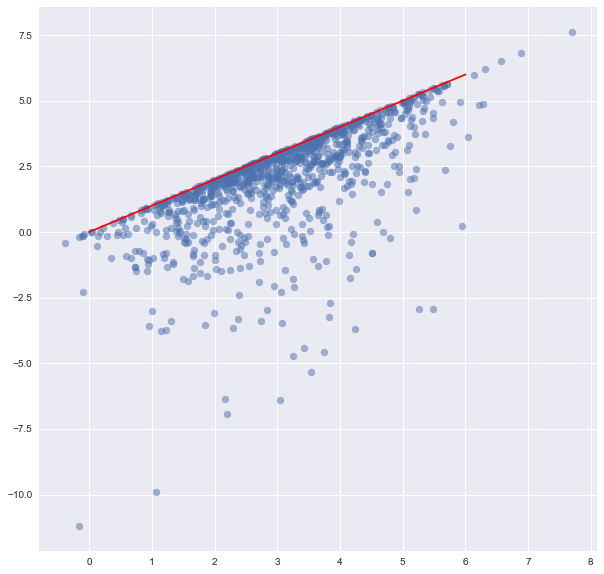

In [1]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('seaborn')

y = np.log10(np.random.lognormal(mean=7, sigma=3, size=1000))
y_hat_bad = y - np.random.normal(0, 1, size=1000)**2

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y, y_hat_bad, alpha=0.5)
ax.plot([0, 6], [0, 6], color='r') 
plt.savefig('./images/bad-regression.png')

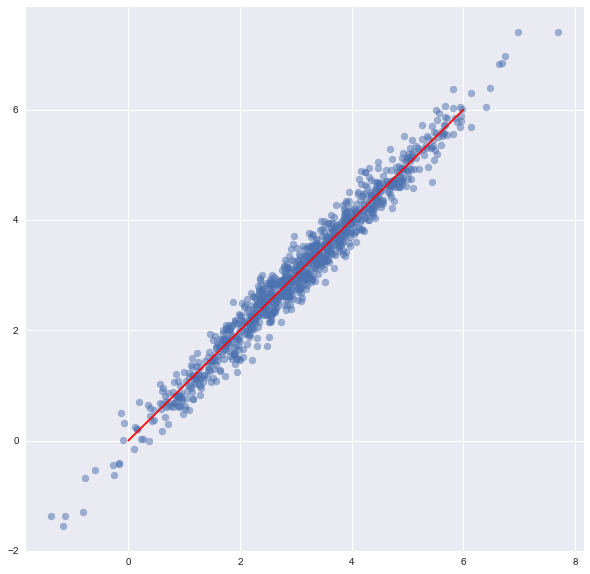

In [2]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('seaborn')

y = np.log10(np.random.lognormal(mean=7, sigma=3, size=1000))
y_hat_better = y + np.random.normal(0, 0.25, size=1000)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y, y_hat_better, alpha=0.5)
ax.plot([0, 6], [0, 6], color='r') 
plt.savefig('./images/better-regression.png')

# Test assumptions

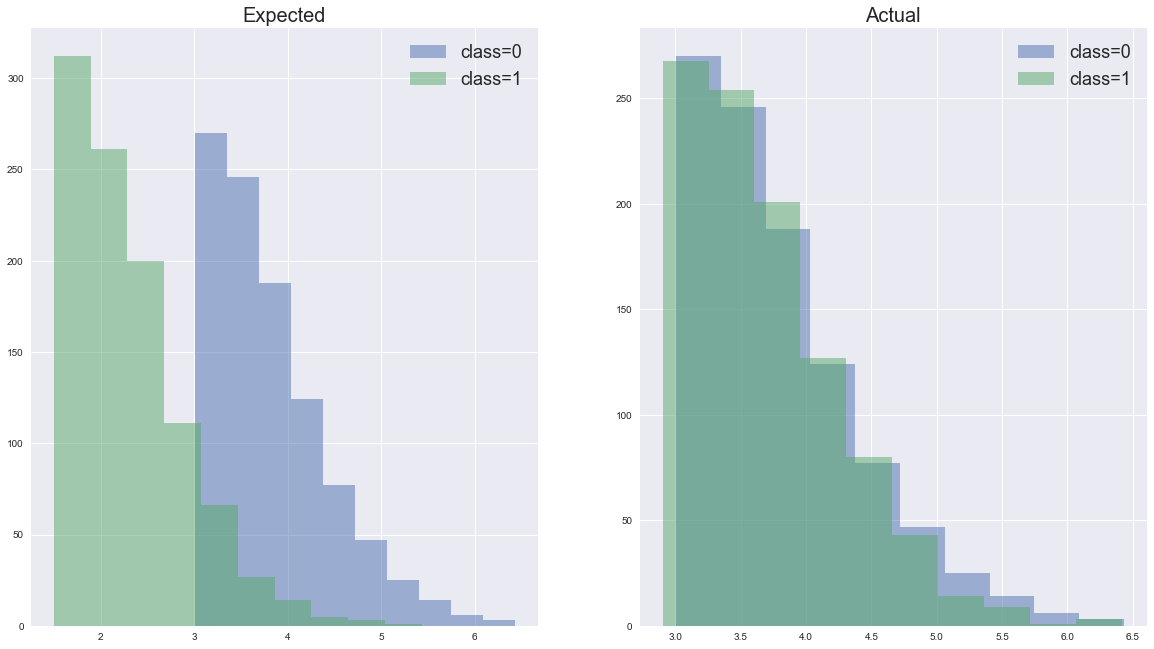

In [38]:
import matplotlib.pyplot as plt; plt.style.use('seaborn')
import numpy as np
import scipy.stats as ss

x1 = ss.truncnorm(a=0, b=np.inf, loc=3, scale=1).rvs(1000)
x2_actual = ss.truncnorm(a=0, b=np.inf, loc=2.9, scale=1).rvs(1000)
x2_expected = ss.truncnorm(a=0, b=np.inf, loc=1.5, scale=1).rvs(1000)

fig, axs = plt.subplots(1, 2, figsize=(20, 11))

axs[0].set_title('Expected', fontsize=20)
axs[0].hist(x1, alpha=0.5, label='class=0')
axs[0].hist(x2_expected, alpha=0.5, label='class=1')
axs[0].legend(fontsize=18)

axs[1].set_title('Actual', fontsize=20)
axs[1].hist(x1, alpha=0.5, label='class=0')
axs[1].hist(x2_actual, alpha=0.5, label='class=1')
axs[1].legend(fontsize=18)


plt.savefig('./images/actual-vs-expected-dist.png')

In [ ]:
import pymc3 as pm
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=3,
    n_informative=2,
    n_redundant=0,
    n_repeated=1,
    n_clusters_per_class=1,
    random_state=0)
X += np.random.RandomState(0).normal(0, 0.25, size=X.shape)

with pm.Model() as model:
    beta = pm.Normal('beta', 0, 1, shape=3)
    y_hat = X[:, 0]*beta[0] + X[:, 1]*beta[1] + X[:, 2]*beta[2]
    y_obs = pm.Bernoulli('y_obs', logit_p=y_hat, observed=y)
    trace = pm.sample(1000, chains=1)

pm.traceplot(trace, figsize=(20, 5))
plt.savefig('images/trace.png')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


# A/B testing

In [2]:
from sklearn.metrics import classification_report
import numpy as np


def display_classification_reports():
    rng = np.random.RandomState(1)
    y_true = rng.binomial(n=1, p=0.2, size=1000)

    # model a
    model_a_recall = rng.binomial(n=1, p=0.8, size=1000)
    model_a_precision = rng.binomial(n=1, p=1-0.9, size=1000)
    y_pred_a = np.where(y_true == 1, model_a_recall, model_a_precision)

    # model b
    model_a_recall = rng.binomial(n=1, p=0.82, size=1000)
    model_a_precision = rng.binomial(n=1, p=1-0.88, size=1000)
    y_pred_b = np.where(y_true == 1, model_a_recall, model_a_precision)

    # print confusion matrices
    print(classification_report(y_true, y_pred_a))
    print(classification_report(y_true, y_pred_b))

In [3]:
display_classification_reports()

             precision    recall  f1-score   support

          0       0.93      0.92      0.92       804
          1       0.67      0.70      0.69       196

avg / total       0.88      0.88      0.88      1000

             precision    recall  f1-score   support

          0       0.96      0.88      0.91       804
          1       0.62      0.84      0.72       196

avg / total       0.89      0.87      0.88      1000



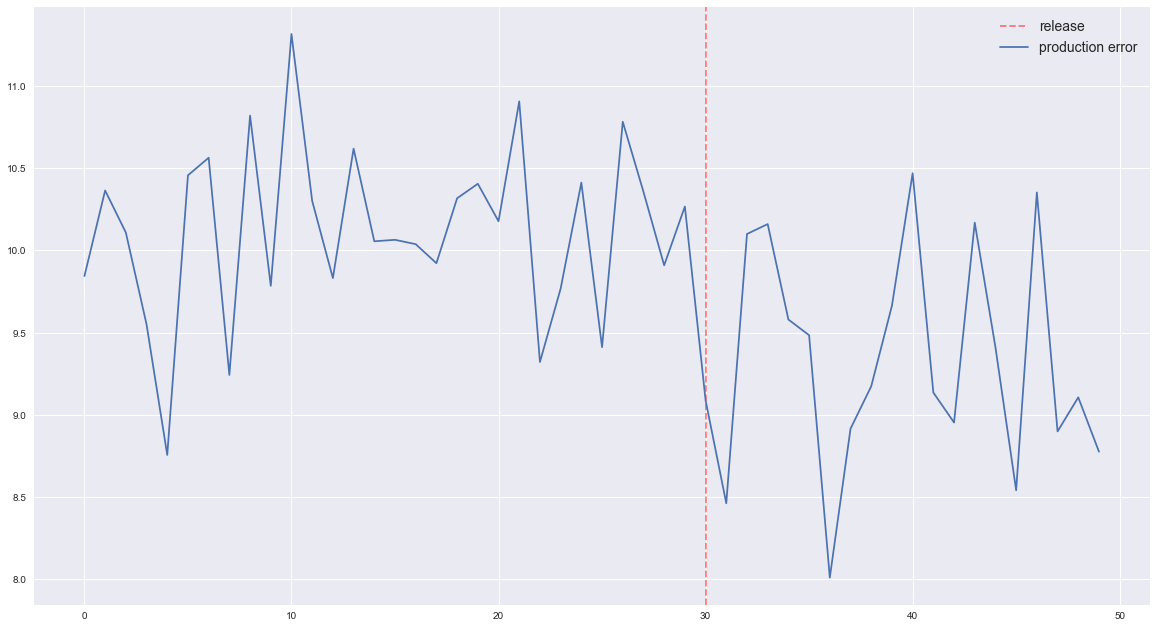

In [74]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('seaborn')

rng = np.random.RandomState(6)
x1 = rng.normal(10, 0.5, size=30)
x2 = rng.normal(9.5, .7, size=20)

fig, ax = plt.subplots(figsize=(20, 11))

ax.axvline(30, color='r', ls='--', alpha=0.5, label='release')
ax.plot(range(50), np.concatenate([x1, x2]), label='production error')
ax.legend(fontsize=14)

plt.savefig('./images/production-error.png')